In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from regression_function import regr

def _distplot(columns):
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.distplot(df[col])
        plt.show()

In [162]:
sns2 = sns

# Read in pickle file into data frame
df = pd.read_pickle("cleaned_salary_dataset.pkl")

df.describe()[['USSalary']]

df[df['USSalary'] < 25000].count()



# sns.displot(df, x="USSalary", bins=10, kind='hist', height=8)

Rating               21947
Salary               21947
Location             21947
Employment Status    21947
Job Roles            21947
USSalary             21947
dtype: int64

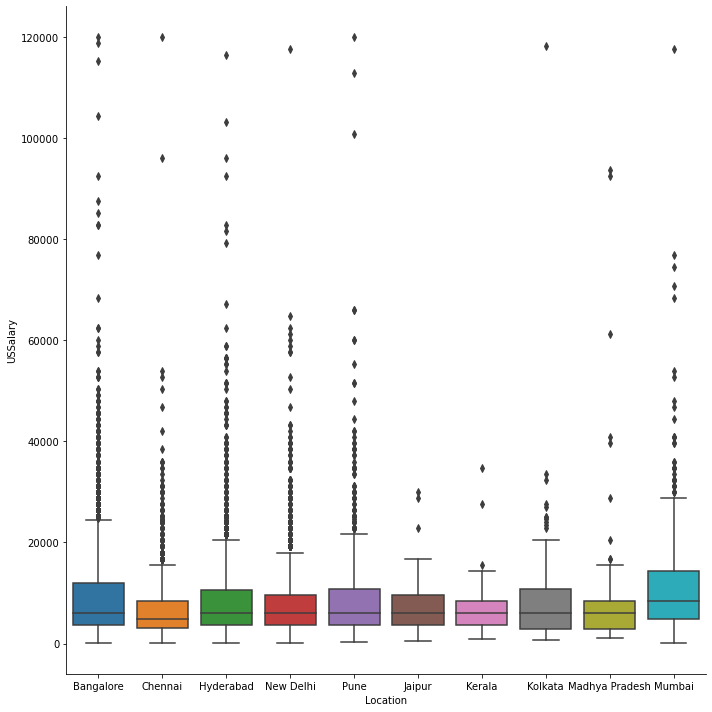

In [163]:
sns.catplot(data=df, x="Location", y="USSalary", height=10, kind='box')

In [164]:
# Use one hot encoding to convert unique values to columns for model
dummy = pd.get_dummies(df.Location)
dummy2 = pd.get_dummies(df['Job Roles'])

dummy3 = pd.get_dummies(df['Employment Status'])
# print(dummy3)
# Concatenate dummies with dataset together into one dataframe
merged = pd.concat([df, dummy, dummy2, dummy3], axis='columns')

In [165]:
#remove unneeded columns and those used in onehot encoding 
# Job Roles, Location and Employment status were converted using One-hot encoding so original fields must be dropped
merged = merged.drop(['Location', 'Job Roles', 'Employment Status'], axis='columns')



In [166]:
# train/test split 
train_set, test_set = train_test_split(merged, test_size=.2, random_state=123)

print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  18215 Test size:  4554


In [171]:
# US Salary and to One Hot Encoded Location correlation
corr = merged[['USSalary', 'Bangalore', 'Chennai', 'Hyderabad', 'Jaipur', 'Kerala','Mumbai', 'New Delhi', 'Pune','Kolkata', 'Madhya Pradesh']].corr()  # plot the heatmap
corr


,USSalary,Bangalore,Chennai,Hyderabad,Jaipur,Kerala,Mumbai,New Delhi,Pune,Kolkata,Madhya Pradesh
USSalary,1.000000,0.050399,-0.056591,-0.009296,-0.005667,-0.014485,0.075694,-0.039014,-0.000484,0.002629,-0.001741
Bangalore,0.050399,1.000000,-0.262580,-0.372902,-0.045100,-0.052109,-0.139209,-0.357666,-0.242734,-0.067001,-0.062490
Chennai,-0.056591,-0.262580,1.000000,-0.171864,-0.020786,-0.024016,-0.064159,-0.164842,-0.111872,-0.030879,-0.028801
Hyderabad,-0.009296,-0.372902,-0.171864,1.000000,-0.029519,-0.034106,-0.091115,-0.234100,-0.158874,-0.043853,-0.040901
Jaipur,-0.005667,-0.045100,-0.020786,-0.029519,1.000000,-0.004125,-0.011020,-0.028313,-0.019215,-0.005304,-0.004947
Kerala,-0.014485,-0.052109,-0.024016,-0.034106,-0.004125,1.000000,-0.012732,-0.032713,-0.022201,-0.006128,-0.005715
Mumbai,0.075694,-0.139209,-0.064159,-0.091115,-0.011020,-0.012732,1.000000,-0.087392,-0.059310,-0.016371,-0.015269
New Delhi,-0.039014,-0.357666,-0.164842,-0.234100,-0.028313,-0.032713,-0.087392,1.000000,-0.152383,-0.042061,-0.039230
Pune,-0.000484,-0.242734,-0.111872,-0.158874,-0.019215,-0.022201,-0.059310,-0.152383,1.000000,-0.028545,-0.026624
Kolkata,0.002629,-0.067001,-0.030879,-0.043853,-0.005304,-0.006128,-0.016371,-0.042061,-0.028545,1.000000,-0.007349


In [172]:
# US Salary and to One Hot Encoded Job Role
corr2 = merged[['USSalary', 'Android', 'Backend', 'Database', 'Frontend',
                      'IOS', 'Java', 'Mobile', 'Python', 'SDE', 'Testing', 'Web']].corr()  # plot the heatmap
corr2

,USSalary,Android,Backend,Database,Frontend,IOS,Java,Mobile,Python,SDE,Testing,Web
USSalary,1.000000,-0.073637,0.020423,0.080774,-0.040114,0.001602,-0.057494,0.030283,-0.065124,0.172580,-0.085426,-0.089971
Android,-0.073637,1.000000,-0.090672,-0.076594,-0.124876,-0.107064,-0.114890,-0.040198,-0.080292,-0.288665,-0.110870,-0.082566
Backend,0.020423,-0.090672,1.000000,-0.046749,-0.076218,-0.065346,-0.070123,-0.024535,-0.049007,-0.176187,-0.067669,-0.050394
Database,0.080774,-0.076594,-0.046749,1.000000,-0.064384,-0.055200,-0.059235,-0.020726,-0.041397,-0.148831,-0.057163,-0.042570
Frontend,-0.040114,-0.124876,-0.076218,-0.064384,1.000000,-0.089997,-0.096575,-0.033790,-0.067493,-0.242649,-0.093196,-0.069404
IOS,0.001602,-0.107064,-0.065346,-0.055200,-0.089997,1.000000,-0.082800,-0.028970,-0.057866,-0.208038,-0.079902,-0.059504
Java,-0.057494,-0.114890,-0.070123,-0.059235,-0.096575,-0.082800,1.000000,-0.031088,-0.062096,-0.223245,-0.085743,-0.063854
Mobile,0.030283,-0.040198,-0.024535,-0.020726,-0.033790,-0.028970,-0.031088,1.000000,-0.021726,-0.078110,-0.030000,-0.022342
Python,-0.065124,-0.080292,-0.049007,-0.041397,-0.067493,-0.057866,-0.062096,-0.021726,1.000000,-0.156018,-0.059923,-0.044625
SDE,0.172580,-0.288665,-0.176187,-0.148831,-0.242649,-0.208038,-0.223245,-0.078110,-0.156018,1.000000,-0.215433,-0.160435


In [173]:
# US Salary and to One Hot Encoded Employment Status
corr3 = merged[['USSalary', 'Contractor', 'Intern', 'Full Time', 'Trainee']].corr()  # plot the heatmap
corr3

,USSalary,Contractor,Intern,Full Time,Trainee
USSalary,1.000000,-0.015318,-0.162455,0.155676,-0.021285
Contractor,-0.015318,1.000000,-0.050135,-0.429317,-0.005983
Intern,-0.162455,-0.050135,1.000000,-0.872775,-0.012163
Full Time,0.155676,-0.429317,-0.872775,1.000000,-0.104152
Trainee,-0.021285,-0.005983,-0.012163,-0.104152,1.000000


In [174]:
# US Salary and to Rating
corr4 = merged[['USSalary', 'Rating']].corr()  # plot the heatmap
corr4

,USSalary,Rating
USSalary,1.00000,0.03794
Rating,0.03794,1.00000


In [12]:
# Define the dependent column values to use in the training and testing
test_train_columns = ['Bangalore', 'Chennai', 'Hyderabad', 'Jaipur', 'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai', 'New Delhi', 'Pune', 'Android', 'Backend', 'Database', 'Frontend',
                      'IOS', 'Java', 'Mobile', 'Python', 'SDE', 'Testing', 'Web', 'Rating', 'Contractor', 'Intern', 'Full Time', 'Trainee']


In [14]:
#Define the training set
X = train_set[test_train_columns]
# Define dependent/target column
y = train_set['USSalary']

# Define the test set
X_test = test_set[test_train_columns]
y_test = test_set['USSalary']

In [15]:
train, test = regr(X,y,X_test,y_test)

In [16]:
train

,R2,MSE,MAE,RMSE
LinearRegressor,0.110551,5.275000e+07,4712.169204,7262.919343
Ridge,0.110598,5.274718e+07,4706.792546,7262.725414
Lasso,0.110567,5.274899e+07,4707.162079,7262.850323
ElasticNet,0.042015,5.681458e+07,5022.607482,7537.544952
KNeighbors,0.047127,5.651139e+07,4845.648444,7517.406114
ExtraTree,0.195768,4.769608e+07,4378.948323,6906.234963
GradientBoosting,0.132815,5.142958e+07,4639.268342,7171.441783
DecisionTree,0.195768,4.769608e+07,4378.948323,6906.234963


In [17]:
test

,R2 Test,MSE Test,MAE Test,RMSE Test
LinearRegressor,0.080389,6.777972e+07,4880.632088,8232.844274
Ridge,0.080277,6.778798e+07,4875.241312,8233.345652
Lasso,0.080258,6.778933e+07,4874.626540,8233.427421
ElasticNet,0.031821,7.135941e+07,5148.368055,8447.450127
KNeighbors,-0.038409,7.653566e+07,5221.189860,8748.466387
ExtraTree,0.057641,6.945632e+07,4912.349835,8334.045884
GradientBoosting,0.088375,6.719110e+07,4823.542048,8197.017891
DecisionTree,0.060152,6.927125e+07,4905.390540,8322.935242


In [19]:
# MINUS RATING
# Define the dependent column values to use in the training and testing
test_train_columns = ['Bangalore', 'Chennai', 'Hyderabad', 'Jaipur', 'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai', 'New Delhi', 'Pune', 'Android', 'Backend', 'Database', 'Frontend',
                      'IOS', 'Java', 'Mobile', 'Python', 'SDE', 'Testing', 'Web', 'Contractor', 'Intern', 'Full Time', 'Trainee']
#Define the training set
X = train_set[test_train_columns]
# Define dependent/target column
y = train_set['USSalary']

# Define the test set
X_test = test_set[test_train_columns]
y_test = test_set['USSalary']

train, test = regr(X,y,X_test,y_test)

In [20]:
train

,R2,MSE,MAE,RMSE
LinearRegressor,0.109219,5.282897e+07,4710.341112,7268.353953
Ridge,0.109280,5.282532e+07,4706.453725,7268.103090
Lasso,0.109250,5.282712e+07,4706.906059,7268.226554
ElasticNet,0.041202,5.686280e+07,5024.506338,7540.742735
KNeighbors,0.008365,5.881026e+07,5154.365304,7668.784857
ExtraTree,0.118386,5.228531e+07,4650.993942,7230.858248
GradientBoosting,0.115952,5.242964e+07,4670.871234,7240.831393
DecisionTree,0.118386,5.228531e+07,4650.993942,7230.858248


In [21]:
test

,R2 Test,MSE Test,MAE Test,RMSE Test
LinearRegressor,0.079417,6.785137e+07,4882.961469,8237.194269
Ridge,0.079184,6.786852e+07,4880.568914,8238.235097
Lasso,0.079159,6.787032e+07,4879.983470,8238.344658
ElasticNet,0.031148,7.140897e+07,5152.230327,8450.382590
KNeighbors,-0.007231,7.423773e+07,5354.515976,8616.132223
ExtraTree,0.085200,6.742507e+07,4831.160330,8211.277095
GradientBoosting,0.084686,6.746296e+07,4840.124609,8213.584006
DecisionTree,0.085200,6.742507e+07,4831.160330,8211.277095


In [22]:
# MINUS EMPLOYMENT STATUS ONE-HOT ENCODED
# Define the dependent column values to use in the training and testing
test_train_columns = ['Bangalore', 'Chennai', 'Hyderabad', 'Jaipur', 'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai', 'New Delhi', 'Pune', 'Android', 'Backend', 'Database', 'Frontend',
                      'IOS', 'Java', 'Mobile', 'Python', 'SDE', 'Testing', 'Web', 'Rating']
#Define the training set
X = train_set[test_train_columns]
# Define dependent/target column
y = train_set['USSalary']

# Define the test set
X_test = test_set[test_train_columns]
y_test = test_set['USSalary']

train, test = regr(X,y,X_test,y_test)

In [24]:
train

,R2,MSE,MAE,RMSE
LinearRegressor,0.071689,5.505475e+07,4878.176293,7419.888678
Ridge,0.071698,5.505417e+07,4876.973146,7419.849846
Lasso,0.071679,5.505533e+07,4877.526557,7419.927841
ElasticNet,0.026737,5.772069e+07,5083.360003,7597.413163
KNeighbors,-0.018021,6.037510e+07,5160.031163,7770.141883
ExtraTree,0.134797,5.131201e+07,4671.995314,7163.240289
GradientBoosting,0.089936,5.397257e+07,4832.919569,7346.602810
DecisionTree,0.134797,5.131201e+07,4671.995314,7163.240289


In [25]:
test

,R2 Test,MSE Test,MAE Test,RMSE Test
LinearRegressor,0.057138,6.949341e+07,4998.649170,8336.270742
Ridge,0.057038,6.950079e+07,4997.694618,8336.713189
Lasso,0.056999,6.950364e+07,4997.581448,8336.884288
ElasticNet,0.021484,7.212127e+07,5197.339970,8492.424539
KNeighbors,-0.052353,7.756339e+07,5422.363312,8807.008163
ExtraTree,0.036887,7.098602e+07,5035.112216,8425.320235
GradientBoosting,0.062922,6.906712e+07,4968.441402,8310.662821
DecisionTree,0.041739,7.062839e+07,5023.997863,8404.069928


In [26]:
# Location ONE-HOT ENCODED and Rating
# Define the dependent column values to use in the training and testing
test_train_columns = ['Bangalore', 'Chennai', 'Hyderabad', 'Jaipur', 'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai', 'New Delhi', 'Pune', 'Rating']
#Define the training set
X = train_set[test_train_columns]
# Define dependent/target column
y = train_set['USSalary']

# Define the test set
X_test = test_set[test_train_columns]
y_test = test_set['USSalary']

train, test = regr(X,y,X_test,y_test)

In [27]:
train

,R2,MSE,MAE,RMSE
LinearRegressor,0.012429,5.856921e+07,5144.710621,7653.052133
Ridge,0.012429,5.856924e+07,5144.630543,7653.054590
Lasso,0.012416,5.857000e+07,5144.518371,7653.103660
ElasticNet,0.004228,5.905560e+07,5173.191068,7684.764004
KNeighbors,-0.129178,6.696739e+07,5581.885834,8183.360652
ExtraTree,0.040962,5.687703e+07,5050.198174,7541.685911
GradientBoosting,0.028461,5.761842e+07,5092.303739,7590.679557
DecisionTree,0.040962,5.687703e+07,5050.198174,7541.685911


In [28]:
test

,R2 Test,MSE Test,MAE Test,RMSE Test
LinearRegressor,0.014586,7.262968e+07,5253.413379,8522.304666
Ridge,0.014575,7.263052e+07,5253.329666,8522.354068
Lasso,0.014534,7.263354e+07,5253.313701,8522.531106
ElasticNet,0.003149,7.347265e+07,5291.797053,8571.619138
KNeighbors,-0.102378,8.125053e+07,5698.725363,9013.907449
ExtraTree,0.017052,7.244796e+07,5230.266587,8511.636659
GradientBoosting,0.022634,7.203652e+07,5210.732637,8487.433091
DecisionTree,0.017136,7.244175e+07,5230.093676,8511.271656


In [30]:
# Location ONE-HOT ENCODED ONlY
# Define the dependent column values to use in the training and testing
test_train_columns = ['Bangalore', 'Chennai', 'Hyderabad', 'Jaipur', 'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai', 'New Delhi', 'Pune']
#Define the training set
X = train_set[test_train_columns]
# Define dependent/target column
y = train_set['USSalary']

# Define the test set
X_test = test_set[test_train_columns]
y_test = test_set['USSalary']

train, test = regr(X,y,X_test,y_test)

In [31]:
train

,R2,MSE,MAE,RMSE
LinearRegressor,0.010839,5.866350e+07,5149.300353,7659.210335
Ridge,0.010839,5.866350e+07,5149.253207,7659.210080
Lasso,0.010825,5.866432e+07,5149.085609,7659.263931
ElasticNet,0.003362,5.910694e+07,5175.207933,7688.103753
KNeighbors,-0.232127,7.307293e+07,5891.728401,8548.270837
ExtraTree,0.010839,5.866350e+07,5149.254243,7659.209906
GradientBoosting,0.010839,5.866352e+07,5149.252661,7659.211215
DecisionTree,0.010839,5.866350e+07,5149.254243,7659.209906


In [32]:
test

,R2 Test,MSE Test,MAE Test,RMSE Test
LinearRegressor,0.013298,7.272464e+07,5263.187388,8527.874218
Ridge,0.013288,7.272539e+07,5263.160718,8527.918530
Lasso,0.013250,7.272814e+07,5263.155802,8528.079382
ElasticNet,0.002423,7.352617e+07,5295.774324,8574.740447
KNeighbors,-0.167135,8.602340e+07,5961.012794,9274.880138
ExtraTree,0.013297,7.272473e+07,5263.164983,8527.879523
GradientBoosting,0.013288,7.272537e+07,5263.201390,8527.917231
DecisionTree,0.013297,7.272473e+07,5263.164983,8527.879523


In [34]:
# JOB ROLE ONE-HOT ENCODED ONlY
# Define the dependent column values to use in the training and testing
test_train_columns = ['Android', 'Backend', 'Database', 'Frontend',
                      'IOS', 'Java', 'Mobile', 'Python', 'SDE', 'Testing', 'Web']
#Define the training set
X = train_set[test_train_columns]
# Define dependent/target column
y = train_set['USSalary']

# Define the test set
X_test = test_set[test_train_columns]
y_test = test_set['USSalary']

train, test = regr(X,y,X_test,y_test)

In [35]:
train

,R2,MSE,MAE,RMSE
LinearRegressor,0.057710,5.588378e+07,4924.689377,7475.545228
Ridge,0.057716,5.588344e+07,4925.041371,7475.522682
Lasso,0.057712,5.588367e+07,4925.139282,7475.538283
ElasticNet,0.022128,5.799399e+07,5098.682403,7615.378817
KNeighbors,-0.354243,8.031520e+07,6468.985156,8961.874921
ExtraTree,0.057716,5.588343e+07,4925.027540,7475.522378
GradientBoosting,0.057706,5.588401e+07,4925.138535,7475.561084
DecisionTree,0.057716,5.588343e+07,4925.027540,7475.522378


In [36]:
test

,R2 Test,MSE Test,MAE Test,RMSE Test
LinearRegressor,0.043138,7.052528e+07,5060.945613,8397.933196
Ridge,0.043043,7.053227e+07,5061.882543,8398.349256
Lasso,0.043088,7.052894e+07,5061.655316,8398.151018
ElasticNet,0.017854,7.238880e+07,5215.773467,8508.160560
KNeighbors,-0.267272,9.340399e+07,6542.783030,9664.574021
ExtraTree,0.043035,7.053285e+07,5061.921390,8398.383880
GradientBoosting,0.043133,7.052565e+07,5061.124339,8397.955361
DecisionTree,0.043035,7.053285e+07,5061.921390,8398.383880


In [37]:
# RATING ONlY
# Define the dependent column values to use in the training and testing
test_train_columns = ['Rating']
#Define the training set
X = train_set[test_train_columns]
# Define dependent/target column
y = train_set['USSalary']

# Define the test set
X_test = test_set[test_train_columns]
y_test = test_set['USSalary']

train, test = regr(X,y,X_test,y_test)

In [38]:
train

,R2,MSE,MAE,RMSE
LinearRegressor,0.001497,5.921759e+07,5182.379327,7695.296449
Ridge,0.001497,5.921759e+07,5182.378756,7695.296449
Lasso,0.001497,5.921759e+07,5182.361267,7695.296691
ElasticNet,0.000860,5.925534e+07,5182.211125,7697.748793
KNeighbors,-0.669021,9.898351e+07,6877.764061,9949.045711
ExtraTree,0.010589,5.867834e+07,5147.451657,7660.178847
GradientBoosting,0.010412,5.868883e+07,5148.147936,7660.863649
DecisionTree,0.010589,5.867834e+07,5147.451657,7660.178847


In [39]:
test

,R2 Test,MSE Test,MAE Test,RMSE Test
LinearRegressor,0.000911,7.363757e+07,5296.442185,8581.233385
Ridge,0.000911,7.363757e+07,5296.443032,8581.233380
Lasso,0.000911,7.363757e+07,5296.468981,8581.233434
ElasticNet,0.000384,7.367646e+07,5300.695635,8583.499488
KNeighbors,-0.500788,1.106152e+08,6955.918158,10517.375934
ExtraTree,0.007722,7.313557e+07,5269.571659,8551.933873
GradientBoosting,0.008029,7.311294e+07,5265.837759,8550.610325
DecisionTree,0.007722,7.313557e+07,5269.571659,8551.933873


In [49]:
# EMP Status 
# Define the dependent column values to use in the training and testing
test_train_columns = ['Contractor', 'Intern', 'Full Time', 'Trainee']
#Define the training set
X = train_set[test_train_columns]
# Define dependent/target column
y = train_set['USSalary']

# Define the test set
X_test = test_set[test_train_columns]
y_test = test_set['USSalary']

train, test = regr(X,y,X_test,y_test)

In [50]:
train

,R2,MSE,MAE,RMSE
LinearRegressor,0.030636,5.748941e+07,5057.439802,7582.177038
Ridge,0.030636,5.748942e+07,5057.425865,7582.177718
Lasso,0.030625,5.749009e+07,5057.364244,7582.221801
ElasticNet,0.013562,5.850204e+07,5125.964065,7648.662547
KNeighbors,0.014757,5.843119e+07,5338.689999,7644.029522
ExtraTree,0.030636,5.748941e+07,5057.429702,7582.177017
GradientBoosting,0.030636,5.748941e+07,5057.429263,7582.177018
DecisionTree,0.030636,5.748941e+07,5057.429702,7582.177017


In [51]:
test

,R2 Test,MSE Test,MAE Test,RMSE Test
LinearRegressor,0.016931,7.245686e+07,5226.154683,8512.159689
Ridge,0.016940,7.245620e+07,5226.054936,8512.120792
Lasso,0.016989,7.245257e+07,5225.483250,8511.907264
ElasticNet,0.008704,7.306321e+07,5258.217194,8547.702241
KNeighbors,0.005904,7.326960e+07,5531.263705,8559.766224
ExtraTree,0.016933,7.245669e+07,5226.127821,8512.149280
GradientBoosting,0.016933,7.245667e+07,5226.126245,8512.148585
DecisionTree,0.016933,7.245669e+07,5226.127821,8512.149280


In [43]:
# EMP STATUS and JOB ROLE RATING
# Define the dependent column values to use in the training and testing
test_train_columns = ['Android', 'Backend', 'Database', 'Frontend',
                      'IOS', 'Java', 'Mobile', 'Python', 'SDE', 'Testing', 'Web', 'Contractor', 'Intern', 'Full Time', 'Trainee']
#Define the training set
X = train_set[test_train_columns]
# Define dependent/target column
y = train_set['USSalary']

# Define the test set
X_test = test_set[test_train_columns]
y_test = test_set['USSalary']

train, test = regr(X,y,X_test,y_test)

In [44]:
train

,R2,MSE,MAE,RMSE
LinearRegressor,0.096615,5.357647e+07,4755.754268,7319.594792
Ridge,0.096677,5.357278e+07,4749.422328,7319.342909
Lasso,0.096662,5.357369e+07,4749.153457,7319.404897
ElasticNet,0.037303,5.709404e+07,5037.463457,7556.060037
KNeighbors,-0.179105,6.992838e+07,5824.360614,8362.319221
ExtraTree,0.099582,5.340049e+07,4726.989871,7307.563940
GradientBoosting,0.099387,5.341208e+07,4728.799160,7308.357180
DecisionTree,0.099582,5.340049e+07,4726.989871,7307.563940


In [45]:
test

,R2 Test,MSE Test,MAE Test,RMSE Test
LinearRegressor,0.065741,6.885934e+07,4940.732220,8298.152877
Ridge,0.066014,6.883919e+07,4933.074869,8296.938390
Lasso,0.066085,6.883400e+07,4932.111974,8296.626047
ElasticNet,0.028084,7.163485e+07,5166.016898,8463.737287
KNeighbors,-0.126378,8.301942e+07,5944.941407,9111.499382
ExtraTree,0.069171,6.860653e+07,4908.241781,8282.906098
GradientBoosting,0.069341,6.859399e+07,4907.353070,8282.148802
DecisionTree,0.069171,6.860653e+07,4908.241781,8282.906098


In [46]:
# JOB ROLE AND LOCATION
# Define the dependent column values to use in the training and testing
test_train_columns = ['Bangalore', 'Chennai', 'Hyderabad', 'Jaipur', 'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai', 'New Delhi', 'Pune', 'Android', 'Backend', 'Database', 'Frontend',
                      'IOS', 'Java', 'Mobile', 'Python', 'SDE', 'Testing', 'Web']
#Define the training set
X = train_set[test_train_columns]
# Define dependent/target column
y = train_set['USSalary']

# Define the test set
X_test = test_set[test_train_columns]
y_test = test_set['USSalary']

train, test = regr(X,y,X_test,y_test)

In [47]:
train

,R2,MSE,MAE,RMSE
LinearRegressor,0.070630,5.511754e+07,4876.120945,7424.118519
Ridge,0.070633,5.511735e+07,4875.587066,7424.105825
Lasso,0.070614,5.511850e+07,4876.280564,7424.183500
ElasticNet,0.025999,5.776446e+07,5085.198589,7600.293277
KNeighbors,-0.075367,6.377610e+07,5191.239502,7985.994156
ExtraTree,0.075787,5.481167e+07,4857.297173,7403.490457
GradientBoosting,0.074575,5.488360e+07,4864.094481,7408.346628
DecisionTree,0.075787,5.481167e+07,4857.297173,7403.490457


In [48]:
test

,R2 Test,MSE Test,MAE Test,RMSE Test
LinearRegressor,0.056274,6.955709e+07,5003.658393,8340.089484
Ridge,0.056238,6.955975e+07,5003.281287,8340.248863
Lasso,0.056194,6.956298e+07,5003.278324,8340.442670
ElasticNet,0.020882,7.216565e+07,5201.152436,8495.036799
KNeighbors,-0.068692,7.876769e+07,5354.230767,8875.116091
ExtraTree,0.058473,6.939504e+07,4987.693397,8330.368281
GradientBoosting,0.058743,6.937512e+07,4990.718725,8329.172991
DecisionTree,0.058473,6.939504e+07,4987.693397,8330.368281
